In [112]:
import pandas as pd
import numpy as np

import numpy as np
import torch

import cv2
import os

import seaborn as sns
from PIL import Image 


import matplotlib.pyplot as plt

from shapely.geometry import LineString
from scipy.ndimage import gaussian_filter1d


from matplotlib.pyplot import MultipleLocator


device = torch.device('cuda:1')

os_path = os.getcwd()
print(os_path)

od_index_path = os_path + '/od_index.txt'
network_path= os_path + '/pic/network_gray.png'
station_path = os_path + '/result/new_station/exp5_method_RLTD_exp5_price__w[[0.1 0.8 0.1]]/tour_idx.txt' 
#result_path = os_path + '/od_index.txt' ['/home/liqing/MORL/Metro-Line/Metro-Line/result/method_RLEU_initial_0_budget_270_w9.999999747378752e-06/17_15_42.156001']
grid_x_max, grid_y_max = 29, 29
grid_num = 29 * 29
label = 'price'

exp, method, initial, budget, new, weight= 5,'RLTD', 0, 270,'true',  [0.1,0.8,0.1]

file_name = '/exp_{}_method_{}_{}_weight_{}'.format(str(exp),str(method), str(label),str(weight))
corrider_path = '/pic/exp_{}_method_{}_{}'.format(str(exp),str(method), str(label))


/home/liqing/MORL/Metro-Line


In [ ]:
import numpy as np

a = np.random.default_rng(20240101)
b = a.integers(0, 10000,size=10)
print(b)


<font size=5>Existing Line</font>

In [105]:


line0_ststion_list = np.array([[8, 2], [10, 3], [10, 5], [11, 6], [11, 7], [12, 9], [12, 11], [12, 12], [12, 13],
                          [12, 14], [12, 15], [12, 16], [12, 17], [12, 18], [12, 20], [11, 22], [11, 23], [11, 24],
                          [11, 25]]).T

line1_ststion_list = np.array([[0, 13], [1, 14], [3, 14], [4, 14], [5, 14], [6, 14], [8, 14], [9, 14], [10, 14],
                          [12, 14], [13, 14], [14, 14], [15, 14], [16, 14], [17, 14], [18, 14], [20, 14], [21, 14],
                          [23, 14], [24, 14], [26, 14]]).T

line2_ststion_list = np.array([[15, 5], [15, 7], [15, 9], [16, 10], [17, 11], [17, 13], [17, 14], [17, 16], [17, 17],
                            [16, 18], [15, 19], [14, 19], [13, 19], [11, 18], [9, 18], [8, 18], [7, 20], [7, 22], [7, 23],
                            [5, 24], [3, 23], [2, 22], [0, 23]]).T
    
line3_ststion_list = np.array([[0, 13], [1, 12], [2, 12], [3, 12], [4, 13], [4, 14], [4, 15], [4, 16], [5, 16], [6, 16],
                            [7, 16], [9, 16], [10, 16], [11, 16], [12, 15], [13, 15], [14, 15], [15, 16], [16, 16], [17, 16],
                            [18, 16], [20, 17], [22, 17], [23, 17], [24, 17], [25, 17], [26, 17], [26, 19], [26, 20]]).T


line0_ststion_list[0], line1_ststion_list[0] = np.abs(line0_ststion_list[0]-28),np.abs(line1_ststion_list[0]-28)

line2_ststion_list[0], line3_ststion_list[0] = np.abs(line2_ststion_list[0]-28),np.abs(line3_ststion_list[0]-28)



existing_x = [line0_ststion_list[0], line1_ststion_list[0], line2_ststion_list[0], line3_ststion_list[0]]

existing_y = [line0_ststion_list[1], line1_ststion_list[1], line2_ststion_list[1], line3_ststion_list[1]]



    
D = np.array([[8, 2], [10, 3], [10, 5], [11, 6], [11, 7], [12, 9], [12, 11], [12, 12], [12, 13],
                          [12, 14], [12, 15], [12, 16], [12, 17], [12, 18], [12, 20], [11, 22], [11, 23], [11, 24],
                          [11, 25]])
E = np.array([[0, 13], [1, 14], [3, 14], [4, 14], [5, 14], [6, 14], [8, 14], [9, 14], [10, 14],
                          [12, 14], [13, 14], [14, 14], [15, 14], [16, 14], [17, 14], [18, 14], [20, 14], [21, 14],
                          [23, 14], [24, 14], [26, 14]])
    


In [ ]:

corridor_station_index = []

if initial == 1:
  print(1111)
  corridor_station = [29, 0]
  for j in range(29):
      for i in range(4):
          if corridor_station[0] < 29 and corridor_station[0] >=0:
            corridor_station_c = corridor_station.copy()
            corridor_station_index.append(corridor_station_c[0]*grid_x_max + corridor_station_c[1])
          corridor_station[0]-=1
      corridor_station[0] +=3
      corridor_station[1] +=1

elif initial == 2:
  print(222)
  corridor_station = [30,0]
  for j in range(29):
      for i in range(6):
          if corridor_station[0] < 29 and corridor_station[0] >=0:
            corridor_station_c = corridor_station.copy()
            corridor_station_index.append(corridor_station_c[0]*grid_x_max + corridor_station_c[1])
          corridor_station[0]-=1
      corridor_station[0] +=5
      corridor_station[1] +=1
  print(222)

elif initial == 3:
  print(333)
  corridor_station = [-2,0]
  for j in range(29):
      for i in range(6):
          if corridor_station[0] < 29 and corridor_station[0] >=0:
            corridor_station_c = corridor_station.copy()

            corridor_station_index.append(corridor_station_c[0]*grid_x_max + corridor_station_c[1])
          corridor_station[0]+=1
      corridor_station[0] -=5
      corridor_station[1] +=1

corridor_x= []
corridor_y = []
for index in corridor_station_index:

    index = int(index)

    grid_x = index // 29
    grid_y = index %  29

    corridor_x.append(grid_x)
    corridor_y.append(28-grid_y)

## Read New Line

In [107]:
new_station_path =  os_path+ '/pic/{}.png'.format(str(file_name))

f = open(station_path, 'r')

result =[]

new_station_x, new_station_y = [], []

for line in f: 

    result = list(line.split(','))
    index_x, index_y = [], []
    grid = []

    for index in result:


        index = int(index)

        grid_x = index // 29
        grid_y = index %  29

        station = [grid_x, grid_y]
        grid.append(station)


        index_x.append(grid_x)
        index_y.append(grid_y)
    
    new_station_x.append(np.array(index_x))

    new_station_y.append(np.array(index_y))
    print(grid)

f.close()


[[5, 0], [7, 2], [8, 2], [8, 3], [9, 3], [10, 3], [11, 3], [11, 4], [12, 4], [12, 5], [12, 6], [13, 6], [13, 7], [14, 7], [14, 8], [15, 8], [15, 9], [16, 9], [16, 10], [17, 10], [18, 10], [18, 11], [18, 12], [18, 13], [18, 14], [18, 15], [19, 15], [19, 16], [20, 16], [20, 17], [21, 17], [22, 17], [22, 18], [23, 18], [23, 19]]


## Plot New Line

/home/liqing/MORL/Metro-Line/pic/exp_5_method_RLTD_price.png


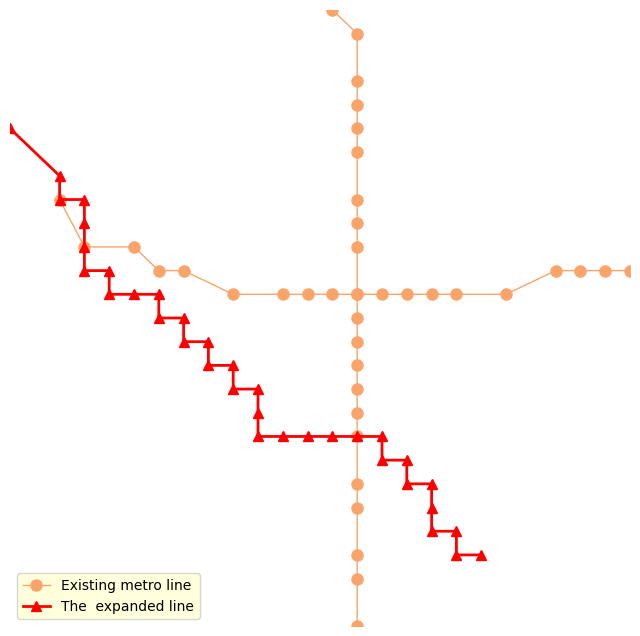

In [108]:

color = ['#A39841', '#90E5F0', '#F0E279', '#F060AA', '#A34977', '#FBA46A', '#FFD6ED', '#FDFFB6', '#CAFFBF',
      '#9BF6FF', 'red', 'blue', 'green', '#C5D188', '#81E3AC', '#A0EBD8', '#74DEE8', '#8FBAFF', 
      '#9D8CFF', '#FFB3FF', '#FA7C5C', '#B9C295','#82D177']

c = [color[i] for i in range(15)]



label_list= ["candidate station", "existing station-1", "existing station-2" ]  # 生成A标签


  
plt.figure(figsize=(8,8), dpi=100)
plt.margins(x=0)
plt.margins(y=0)
#plt.xlabel("x - label")
#plt.ylabel("y - label")
h = []

plt.xticks(np.linspace(0,29,29,endpoint=True))
plt.yticks(np.linspace(0,29,29,endpoint=True))

h1, = plt.plot(existing_y[0], existing_x[0], 'go-', color = c[5], label='m=10, p=10%',linewidth=1, markersize='8')
plt.plot(existing_y[1], existing_x[1], 'go-',  color = c[5],  linewidth=1, label=label_list[2],markersize='8')

if initial:

  corridor1_x, corridor1_y, corridor2_x, corridor2_y = [], [], [], []

  if initial == 1:
      x_1, y_1, x_2, y_2 = 0, 2, 1, 0
  elif initial == 2:
      x_1, y_1, x_2, y_2 = 0, 3, 2, 0
  elif initial == 3:
      x_1, y_1, x_2, y_2 = 0, 25, 2, 28

  for i in range(29):

      if y_1 < 29 and y_1 >=0 :
          corridor1_x.append(x_1), corridor1_y.append(y_1)
      if x_2 < 29:
          corridor2_x.append(x_2), corridor2_y.append(y_2)
      
      x_1 +=1
      x_2 +=1

      if initial == 1 or initial == 2:
          
          y_1 +=1
          y_2 +=1

      elif initial == 3:

          y_1 -=1
          y_2 -=1




  plt.plot(corridor1_x, corridor1_y, 'bo-', color = c[5],  linewidth=3, label=label_list[2],markersize='0', alpha=0)
  plt.plot(corridor2_x, corridor2_y, 'bo-', color = c[5],  linewidth=3, label=label_list[2],markersize='0', alpha = 0)



h2, = plt.plot(new_station_y[0], new_station_x[0], linestyle='-',marker = '^',color = c[0+10],linewidth=2, markersize='7')
#h5, = plt.plot(new_station_y[2], new_station_x[2], linestyle=':',marker = 'o',color = c[1+10],linewidth=2, markersize='7')


# b = [475,476,477]

# for i in range(len(b)):

#   b_x = b[i] // 29
#   b_y = b[i] %  29

#   plt.scatter(b_y,28-b_x, color='black',marker='<', s =200)


plt.margins(x=0)
plt.margins(y=0)
plt.axis('off')


corridor_path_ =  os_path+ corrider_path+'.png'
#plt.legend([h1,h2,h3,h4],['Existing metro line','RLEU','RLTD','RLWS'],loc='lower right', facecolor='xkcd:eggshell',prop = {'size':15})
#plt.legend([h1],['Existing metro line'],loc='lower right', facecolor='xkcd:eggshell',prop = {'size':15})
plt.legend([h1,h2],['Existing metro line', 'The  expanded line',],loc='lower left', facecolor='xkcd:eggshell',prop = {'size':10})
#plt.title('Corridor')    
#plt.savefig(new_station_path, bbox_inches='tight', pad_inches=0.02)
plt.savefig(corridor_path_, bbox_inches='tight', pad_inches=0.02)
print(corridor_path_ )
corridor = Image.open(corridor_path_).convert("RGBA")


plt.grid(axis='x',linestyle='-.',linewidth=1,color='black',alpha=0.5)
plt.grid(axis='y',linestyle='-.',linewidth=1,color='black',alpha=0.5)


plt.show()


plt.close()


In [ ]:
data = [51.531,51.625,52.063]
average = sum(data)/len(data)
result = round(average, 4)
print(result)
std = np.std(data, ddof=1)
print(std)

<font size=5>Plot Corridor</font>

In [ ]:

color = ['#A39841', '#90E5F0', '#F0E279', '#F060AA', '#A34977', '#FBA46A', '#FFD6ED', '#FDFFB6', '#CAFFBF',
      '#9BF6FF', '#A0C4FF', '#BDB2FF', '#FFC6FF', '#C5D188', '#81E3AC', '#A0EBD8', '#74DEE8', '#8FBAFF', 
      '#9D8CFF', '#FFB3FF', '#FA7C5C', '#B9C295','#82D177']

c = [color[i] for i in range(15)]


label_list= ["candidate station", "existing station-1", "existing station-2" ]  # 生成A标签


  
plt.figure(figsize=(8,8), dpi=100)
plt.margins(x=0)
plt.margins(y=0)
#plt.xlabel("x - label")
#plt.ylabel("y - label")

plt.xticks(np.linspace(0,29,29,endpoint=True))
plt.yticks(np.linspace(0,29,29,endpoint=True))

print(len(c))

h1, = plt.plot(existing_y[0], existing_x[0], 'go-', color = c[5], label='m=10, p=10%',linewidth=1, markersize='8')
h2, = plt.plot(existing_y[1], existing_x[1], 'go-',  color = c[5],  linewidth=1, label=label_list[2],markersize='8')
h2, = plt.plot(existing_y[2], existing_x[2], 'bo-',  color = c[9], linewidth=1, label=label_list[2],markersize='8')
h4, = plt.plot(existing_y[3], existing_x[3], 'bo-',  color = c[9], linewidth=1, label=label_list[2],markersize='8')




if initial:

  corridor1_x, corridor1_y, corridor2_x, corridor2_y = [], [], [], []

  if initial == 1:
      x_1, y_1, x_2, y_2 = 0, 2, 1, 0
  elif initial == 2:
      x_1, y_1, x_2, y_2 = 0, 3, 2, 0
  elif initial == 3:
      x_1, y_1, x_2, y_2 = 0, 25, 2, 28

  for i in range(29):

      if y_1 < 29 and y_1 >=0 :
          corridor1_x.append(x_1), corridor1_y.append(y_1)
      if x_2 < 29:
          corridor2_x.append(x_2), corridor2_y.append(y_2)
      
      x_1 +=1
      x_2 +=1

      if initial == 1 or initial == 2:
          
          y_1 +=1
          y_2 +=1

      elif initial == 3:

          y_1 -=1
          y_2 -=1




  plt.plot(corridor1_x, corridor1_y, 'bo-', color = c[5],  linewidth=3, label=label_list[2],markersize='0', alpha=0)
  plt.plot(corridor2_x, corridor2_y, 'bo-', color = c[5],  linewidth=3, label=label_list[2],markersize='0', alpha = 0)

plt.margins(x=0)
plt.margins(y=0)
plt.axis('off')


corridor_path =  os_path+ '/pic/exp1_method_{}_scatter_{}.png'.format(str(method),str(initial))
#plt.legend([h1,h2],['Metro line before experimental data','Metro line after experimental data'],loc='lower left', facecolor='xkcd:eggshell',prop = {'size':10})
        
#plt.savefig(new_station_path, bbox_inches='tight', pad_inches=0.02)
plt.savefig(corridor_path, bbox_inches='tight', pad_inches=0.02)

corridor = Image.open(corridor_path).convert("RGBA")


print(corridor_path)




plt.grid(axis='x',linestyle='-.',linewidth=1,color='black',alpha=0.5)
plt.grid(axis='y',linestyle='-.',linewidth=1,color='black',alpha=0.5)


plt.show()


plt.close()


## Merge new station

In [ ]:



#plt.plot(index_y, np.abs(index_x-28), 'bo-',color = 'red',linewidth=1, markersize='10')

plt.plot(new_station_x, new_station_y, 'bo-',color = 'red',linewidth=1, markersize='10')



first_line = LineString(np.column_stack((existing_y[0], existing_x[0])))
second_line = LineString(np.column_stack((existing_y[1], existing_x[1])))
third_line = LineString(np.column_stack((new_station_y, np.abs(new_station_x-28))))
intersection = third_line.intersection(first_line)
print(intersection)


#plt.plot(*intersection.xy, 'o')

#plt.plot(*intersection.xy, 'o')

intersection = third_line.intersection(second_line)

a= np.array(intersection)

c = np.array(intersection.coords)



plt.plot(*intersection.xy, 'o')

plt.margins(x=0)
plt.margins(y=0)
plt.axis('off')

plt.savefig(scatter_path, bbox_inches='tight', pad_inches=0.02)

plt.show()

plt.close()


corridor = Image.open(corridor_path).convert("RGBA")
img = Image.open(scatter_path).convert("RGBA")

image = img.resize(corridor.size) 

image.save(scatter_path)


## Delete Background

In [113]:
#img = Image.open(new_station_path)
img = Image.open(corridor_path_)


img = img.convert('RGBA')

W, H = img.size

white_pixel = (255, 255, 255, 255)

for h in range(H):

    for w in range(W):

        if img.getpixel((w,h)) == white_pixel:

            img.putpixel((w,h),(255,255,255,0))

#img.save(new_station_path)

img.save(corridor_path_+'.png')


## TransPNG without new line

In [ ]:
img = Image.open(corridor_path)
img = img.convert("RGBA")
datas = img.getdata()
newData = list()
for item in datas:
        if item[0] > 220 and item[1] > 220 and item[2] > 220:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
img.putdata(newData)

## TransPNG

In [114]:
img = Image.open(corridor_path_)
img = img.convert("RGBA")
datas = img.getdata()
newData = list()
for item in datas:
        if item[0] > 220 and item[1] > 220 and item[2] > 220:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
img.putdata(newData)

## blend corridor

In [38]:


#img1 =  Image.open(new_station_path).convert("RGBA")
img1 =  Image.open(corridor_path).convert("RGBA")

img2 = Image.open(network_path).convert("RGBA")
img2 = img2.resize(img1.size) 
final = Image.new("RGBA", img1.size)  
final = Image.alpha_composite(final, img2)
final = Image.alpha_composite(final, img1)

#net_with_fourLine =  os_path+ '/pic/net_with_4Line.png'
exp1_1_path = os_path + '/pic'+file_name +'added.png'
print(exp1_1_path)
final.save(exp1_1_path)


NameError: name 'corridor_path' is not defined

## blend heatmap

In [116]:
img1 = Image.open(corridor_path_+'.png').convert("RGBA")


img2 = Image.open('/home/liqing/MORL/Metro-Line/pic/price_heatmap_resize.png').convert('RGBA')
img2 = img2.resize(img1.size) 


final = Image.new("RGBA", img1.size)             # 合成的image
final = Image.alpha_composite(final, img2)
final = Image.alpha_composite(final, img1)

#final=final.convert('RGB')

final.save('/home/liqing/MORL/Metro-Line/pic/exp_{}_{}_weight{}_{}.png'.format(str(exp),str(label), str(weight),str(method)))

<font size=5>Resize</font>

In [ ]:

img1 = '{}.png'.format(corridor_path_)
img2 = '/home/liqing/MORL/Metro-Line/pic/OD_heatmap_resize.png'
image1 = cv2.imread(img1)
image2 = cv2.imread(img2)
image = cv2.resize(image1, (800, 800), interpolation=cv2.INTER_CUBIC)
image_path_1 = '/home/liqing/MORL/Metro-Line/pic/exp_{}__{}_weight{}_{}.png'.format(str(exp),str(label), str(weight),str(method))
cv2.imwrite(image_path_1, image)
image = cv2.resize(image2, (800, 800), interpolation=cv2.INTER_CUBIC)
image_path_2 = '/home/liqing/MORL/Metro-Line/Metro-Line/pic/OD_resize.png'
cv2.imwrite(image_path_2, image)


Train_process

In [ ]:
training_path = os.path.join(result_path[0],'reward_actloss_criloss.txt')

f = open(training_path, 'r')

od, equity = [], []


for line in f: 

    result = list(line.split('\t'))

    od.append(float(result[3]))
    equity.append(float(result[4]))

od, equity = np.array(od), np.array(equity)
od_smoothed,equity_smoothed = gaussian_filter1d(od, sigma=3), gaussian_filter1d(equity, sigma=3)

# plt.subplot(2, 1, 1)
plt.plot(od_smoothed, '-', label="RLTD-Satisfied OD demand")
plt.plot(equity_smoothed, '-', label="RLTD-Social equity")

f.close()
#plt.title('pareto_{}_initial{}_budget{}'.format(str(args_pareto),str(corridor),str(args_budget)))

# y_major_locator=MultipleLocator(4)

# ax=plt.gca()


# ax.yaxis.set_major_locator(y_major_locator)


# plt.subplot(2, 1, 2)
# plt.plot(critic_loss_list, 'o-', label="critic_loss")
# plt.xlabel('Critic_loss vs. epoches')
# plt.ylabel('Critic loss')
# plt.legend(loc='best')


if len(result_path) > 1: 
    training_path = os.path.join(result_path[1],'reward_actloss_criloss.txt')

    f = open(training_path, 'r')

    od, equity = [], []


    for line in f: 

        result = list(line.split('\t'))

        od.append(float(result[3]))
        equity.append(float(result[4]))

    od, equity = np.array(od), np.array(equity)
    od_smoothed,equity_smoothed = gaussian_filter1d(od, sigma=3), gaussian_filter1d(equity, sigma=3)

    # plt.subplot(2, 1, 1)
    plt.plot(od_smoothed, '-', label="RLWS-Satisfied OD demand")
    plt.plot(equity_smoothed, '-', label="RLWS-Social equity")
    f.close()



    training_path = os.path.join(result_path[2],'reward_actloss_criloss.txt')

    f = open(training_path, 'r')

    od, equity = [], []


    for line in f: 

        result = list(line.split('\t'))

        od.append(float(result[3]))
        equity.append(float(result[4]))

    od, equity = np.array(od), np.array(equity)
    od_smoothed,equity_smoothed = gaussian_filter1d(od, sigma=3), gaussian_filter1d(equity, sigma=3)

    # plt.subplot(2, 1, 1)
    plt.plot(od_smoothed, '-', label="RLSM-Satisfied OD demand")
    plt.plot(equity_smoothed, '-', label="RLSM-Social equity")
    f.close()
    #plt.title('pareto_{}_initial{}_budget{}'.format(str(args_pareto),str(corridor),str(args_budget)))

    # y_major_locator=MultipleLocator(4)

    # ax=plt.gca()


    # ax.yaxis.set_major_locator(y_major_locator)

plt.ylabel('Reward')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.margins(x=0)
plt.margins(y=0)

picture_path = os.path.join('/home/liqing/MORL/Metro-Line/Metro-Line/pic', 'loss_pareto_{}_initial{}_budget{}_w{}_method'.format(str(pareto),str(initial),str(budget),str(weight),str(method)))
    

plt.savefig(picture_path, dpi=300,bbox_inches='tight')

plt.close()

In [ ]:
a = [3,3,3,3,4,5,6,7,8,9,10,11,12,12,12,13,13,14,15,16,17,18,19,20,20,21,22,23,24,25,26,26,28]
b = [27,25,24,23,22,22,21,20,20,20,19,19,18,17,16,15,14,13,13,13,13,13,12,11,10,9,9,9,9,8,7,6,4]


print(len(a),len(b))

path = '/home/liqing/MORL/Metro-Line/result/new_station/exp2_RLWS_1.txt'

f = open(path, 'w')

to_write = ''

for i in range(len(a)):
    c = a[i] * 29 + b[i]
    to_write = to_write + str(c) + ','

to_write1 = to_write.rstrip(',')
f.write(to_write1)
f.close()

## 3D

In [ ]:


def keep_efficient(pts):
    'returns Pareto efficient row subset of pts'
    # sort points by decreasing sum of coordinates
    pts = pts[pts.sum(1).argsort()[::-1]]
    # initialize a boolean mask for undominated points
    # to avoid creating copies each iteration
    undominated = np.ones(pts.shape[0], dtype=bool)
    for i in range(pts.shape[0]):
        # process each point in turn
        n = pts.shape[0]
        if i >= n:
            break
        # find all points not dominated by i
        # since points are sorted by coordinate sum
        # i cannot dominate any points in 1,...,i-1
        undominated[i+1:n] = (pts[i+1:] >= pts[i]).any(1) 
        # keep points undominated so far
        pts = pts[undominated[:n]]
    return pts



_result_path = '/home/liqing/MORL/Metro-Line/result/exp3_method_RLTD_ini_None_best_record.txt'

f = open(_result_path, 'r')

od,eq,ra = [],[],[]

a=[]

for line in f: 
    line = line.replace('\n', '') 
    result = line.split("\t")
    result_f = [float(i) for i in result]
    a.append(result_f)
    od.append(result_f[0]),eq.append(line[1]),ra.append(result_f[2])

pts_list = [list(pt) for pt in a]

print(len(pts_list))

a = keep_efficient(pts)

print(len(a))


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import re
from matplotlib import cm

fig = plt.figure(figsize=(10, 7))


def keep_efficient(pts):
    'returns Pareto efficient row subset of pts'
    # sort points by decreasing sum of coordinates
    pts = pts[pts.sum(1).argsort()[::-1]]
    # initialize a boolean mask for undominated points
    # to avoid creating copies each iteration
    undominated = np.ones(pts.shape[0], dtype=bool)
    for i in range(pts.shape[0]):
        # process each point in turn
        n = pts.shape[0]
        if i >= n:
            break
        # find all points not dominated by i
        # since points are sorted by coordinate sum
        # i cannot dominate any points in 1,...,i-1
        undominated[i+1:n] = (pts[i+1:] >= pts[i]).any(1) 
        # keep points undominated so far
        pts = pts[undominated[:n]]
    return pts



_result_path = '/home/liqing/MORL/Metro-Line/result/exp3_3d.txt'

f = open(_result_path, 'r')

od,eq,ra = [],[],[]

a=[]

for line in f: 
    line = line.replace('\n', '') 
    result = line.split("\t")
    result_f = [float(i) for i in result]
    a.append(result_f)
    od.append(result_f[0]),eq.append(line[1]),ra.append(result_f[2])


pts_list = np.array(a)
RLEU_list = pts_list[0:36]
RLTD_list = pts_list[:]
RLWS_list = pts_list[73:132]
domain_list = [RLEU_list,RLTD_list,RLWS_list]





pareto_EU = keep_efficient(RLEU_list)
pareto_TD = keep_efficient(RLTD_list)
pareto_WS = keep_efficient(RLWS_list)


pareto = [pareto_EU, pareto_TD, pareto_WS]

domain = []


for i in range(len(RLTD_list)):  
      if RLTD_list[i] not in pareto_TD:
          domain.append(list(RLTD_list[i]))
print(len(domain))
domain = np.array(domain)

        


#ax.scatter3D(domain[:,0], domain[:,1], domain[:,2], color="black",label='Dot')
plt.scatter(pareto_TD[:,2], pareto_TD[:,1],marker = 'o',color = c[5], s =90)



#ax.scatter3D(pareto_EU[:,0], pareto_EU[:,1], pareto_EU[:,2], color=c[10],label='RLEU')
#ax.scatter3D(pareto_WS[:,0], pareto_WS[:,1], pareto_WS[:,2], color=c[10],label='RLWS')
#ax.scatter3D(pareto_TD[:,0], pareto_TD[:,1], pareto_TD[:,2], color=c[5],label='Pareto optiaml point',marker = '*',s=100)


plt.margins(x=0)
plt.margins(y=0)

plt.ylabel('Social equity',fontsize = 18)
plt.xlabel('Radiation accessibility',fontsize = 18)

plt.yticks(fontsize = 15) 
plt.xticks(fontsize = 15) 

plt.margins(x=0)
plt.margins(y=0)

#plt.title("simple 3D scatter plot")

# show plot
pic_path = '/home/liqing/MORL/Metro-Line/pic/2D_eq_ac.png'

plt.savefig(pic_path, dpi=300,bbox_inches='tight')

plt.show()

plt.close()


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import re
from matplotlib import cm

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")

def keep_efficient(pts):
    'returns Pareto efficient row subset of pts'
    # sort points by decreasing sum of coordinates
    pts = pts[pts.sum(1).argsort()[::-1]]
    # initialize a boolean mask for undominated points
    # to avoid creating copies each iteration
    undominated = np.ones(pts.shape[0], dtype=bool)
    for i in range(pts.shape[0]):
        # process each point in turn
        n = pts.shape[0]
        if i >= n:
            break
        # find all points not dominated by i
        # since points are sorted by coordinate sum
        # i cannot dominate any points in 1,...,i-1
        undominated[i+1:n] = (pts[i+1:] >= pts[i]).any(1) 
        # keep points undominated so far
        pts = pts[undominated[:n]]
    return pts



_result_path = '/home/liqing/MORL/Metro-Line/result/exp3_3d.txt'

f = open(_result_path, 'r')

od,eq,ra = [],[],[]

a=[]

for line in f: 
    line = line.replace('\n', '') 
    result = line.split("\t")
    result_f = [float(i) for i in result]
    a.append(result_f)
    od.append(result_f[0]),eq.append(line[1]),ra.append(result_f[2])


pts_list = np.array(a)
RLEU_list = pts_list[0:36]
RLTD_list = pts_list[:]
RLWS_list = pts_list[73:132]
domain_list = [RLEU_list,RLTD_list,RLWS_list]





pareto_EU = keep_efficient(RLEU_list)
pareto_TD = keep_efficient(RLTD_list)
pareto_WS = keep_efficient(RLWS_list)

pareto = [pareto_EU, pareto_TD, pareto_WS]

domain = []

for i in range(len(RLTD_list)):  
      if RLTD_list[i] not in pareto_TD:
          domain.append(list(RLTD_list[i]))
print(len(domain))
domain = np.array(domain)
        


#ax.scatter3D(domain[:,0], domain[:,1], domain[:,2], color="black",label='Dot')
ax.scatter3D(domain[:,0], domain[:,1], domain[:,2], color=c[4],label='Domainted',s=80)
#ax.scatter3D(pareto_EU[:,0], pareto_EU[:,1], pareto_EU[:,2], color=c[10],label='RLEU')
#ax.scatter3D(pareto_WS[:,0], pareto_WS[:,1], pareto_WS[:,2], color=c[10],label='RLWS')
ax.scatter3D(pareto_TD[:,0], pareto_TD[:,1], pareto_TD[:,2], color=c[5],label='Pareto optimal point',marker = '*',s=100)

plt.legend()
ax.set_xlabel('OD demand')
ax.set_ylabel('Social equity')
ax.set_zlabel('Radiation accessibility')

plt.margins(x=0)
plt.margins(y=0)

#plt.title("simple 3D scatter plot")

# show plot
pic_path = '/home/liqing/MORL/Metro-Line/pic/3d.png'

plt.savefig(pic_path, dpi=300,bbox_inches='tight')

plt.show()

plt.close()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif']='Lisu'
plt.rcParams['axes.unicode_minus']=False

strike = np.linspace(50, 150, 24)
ttm = np.linspace(0.5, 2.5, 24)
print(strike)
strike, ttm = np.meshgrid(strike, ttm)
iv = (strike - 100) ** 2 / (100 * strike) / ttm
print(iv)
# generate fake implied volatilities

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')

'''同上面两行代码
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)
'''

surf = ax.plot_surface(strike, ttm, iv, rstride=2, 
                       cstride=2, cmap=plt.cm.coolwarm, 
                       linewidth=0.5, antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')
fig.colorbar(surf, shrink=0.5, aspect=5)


In [ ]:

'''
给你n个点，m条无向边，每条边都有长度d和花费p，给你起点s终点t，
要求输出起点到终点的最短距离及其花费，如果最短距离有多条路线，则输出花费最少的。
输入描述:
输入n,m，点的编号是1~n,然后是m行，每行4个数 a,b,d,p，表示a和b之间有一条边，且其长度为d，花费为p。
最后一行是两个数 s,t;起点s，终点t。n和m为0时输入结束。
(1<n<=1000, 0<m<100000, s != t)
输出描述:
输出 一行有两个数， 最短距离及其花费。
输入
3 2
1 2 5 6
2 3 4 5
1 3
0 0
输出
9 11
您的代码已保存
运行超时:您的程序未能在规定时间内运行结束，请检查是否循环有错或算法复杂度过大。
case通过率为90.91%
感谢
https://www.bilibili.com/video/av38254646  讲的真的非常清楚
'''
 
if __name__=='__main__':
    line1=list(map(int,input().split()))
    num_node=line1[0]
    num_vertice=line1[1]
 
    no_direct_graph=[]
 
    for i in range(num_vertice):
        no_direct_graph.append(list(map(int,input().split())))
 
    start_end=list(map(int,input().split()))
 
    dict_graph={}
    for k in range(len(no_direct_graph)):#对于无向图中的每一条边
        for j in range(num_node):
            if no_direct_graph[k][0]==j+1:
                if j+1 not in dict_graph:
                    dict_graph[j+1]=[no_direct_graph[k]]
                else:
                    dict_graph[j + 1].append(no_direct_graph[k])
            elif no_direct_graph[k][1]==j+1:
                if j + 1 not in dict_graph:
                    dict_graph[j + 1] = [[no_direct_graph[k][1],no_direct_graph[k][0],no_direct_graph[k][2],no_direct_graph[k][3]]]
                else:
                    dict_graph[j + 1].append([no_direct_graph[k][1],no_direct_graph[k][0],no_direct_graph[k][2],no_direct_graph[k][3]])
    # print(dict_graph)   以字典的形式构造无向图
 
    visited=[]
    unvisited=[_+1 for _ in range(num_node)]
 
    distance=[float('inf') for _ in range(num_node)]
 
    money=[0 for _ in range(num_node)]
 
    temp=start_end[0]
    # money[temp - 1] = 0
    distance[temp-1]=0
    for j in range(num_node):
        temp_neighbor = dict_graph[temp]
        for route in temp_neighbor:
            # print('route',route)
            if route[1] not in visited:  # 如果当前节点的邻居节点没有被访问过
                if distance[temp - 1] + route[2]<distance[route[1] - 1]:
                    distance[route[1] - 1]=distance[temp - 1] + route[2]
                    # print(route[-1])
                    money[route[1] - 1]=money[temp-1]+route[-1]
                elif distance[temp - 1] + route[2]==distance[route[1] - 1]:#如果距离相等，取花费少的路径
                    if money[temp-1]+route[-1]<money[route[1] - 1]:
                        distance[route[1] - 1]=distance[temp - 1] + route[2]
                        money[route[1] - 1] = money[temp - 1] + route[-1]
        # 找到money数组中除了当前temp的money值之外剩下的所有元素中最小money数量的位置，作为下一个temp位置
        distance_compare = distance.copy()
        distance_compare[temp - 1] = float("inf")
 
        visited.append(temp)
        if temp in unvisited:
            unvisited.remove(temp)
 
        min_value = float("inf")
        min_index = 0
 
        for k in range(num_node):
            if k+1 in unvisited:#如果当前的节点并没有被访问过
                if distance_compare[k] < min_value:
                    min_value = distance_compare[k]
                    min_index = k
        temp = min_index + 1
 
    print(distance[start_end[-1]-1],money[start_end[-1]-1])
 
    # min_distance=min(distance)
    # min_money=[]
    # for i,q in enumerate(distance):
    #     if q==min_distance:
    #         min_money.append(money[i])
    # print(min_distance,min(min_money))